# 04.05 nonlinear

##### code, support for section text

In [6]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd
  import scipy as sp
  from tabulate import tabulate

  pd.set_option('display.max_rows',10)


###### code, examples

In [2]:
# example 21,22,23

# references
#https://stackoverflow.com/questions/31556446/how-to-draw-axis-in-the-middle-of-the-figure
#https://stackoverflow.com/questions/37039685/hide-tick-label-values-but-keep-axis-labels

# extra term k mods circle radius for intersection

def format_axes(ax):
  ax.set_aspect("equal","box")
  # Move left y-axis and bottom x-axis to centre, passing through (0,0)
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  # Eliminate upper and right axes
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  # Show ticks in the left and lower axes only
  #ax.xaxis.set_ticks_position('bottom')
  #ax.yaxis.set_ticks_position('left')
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.set_yticks([])

def xy_circle(x,y,r):
  a=x-r; b=x+r; nx = 101
  xs = np.zeros((2*nx+1))
  ys = np.zeros((2*nx+1))
  for i in range(nx):
    xs[ i] = (b+a)/2 + (b-a)/2*np.cos(np.pi*(2*i+1)/(2*nx))
    xs[2*nx-1-i] = (b+a)/2 + (b-a)/2*np.cos(np.pi*(2*i+1)/(2*nx))
    ys[ i] = y + np.sqrt(pow(r,2)-pow(xs[ i]-x,2))
    ys[2*nx-1-i] = 2*y - ys[i]
  # close circle if plot vs scatter
  xs[-1] = xs[0]
  ys[-1] = ys[0]
  if False:
    for i in range(2*nx+1):
      print(f"{i}: {xs[i]},{ys[i]}")
  return xs,ys

# example 21: gauss-newton
def ex_21(circles,r,drx,dry,eps):
  # method, setup
  x_old = np.zeros((2))
  x_new = x_old.copy()
  n_eqns = len(circles)
  n_vars = len(x_old)
  a = np.zeros((n_eqns,n_vars))
  b = np.zeros((n_eqns))
  # method, iteration
  for k in range(10):
    for i,circle in enumerate(circles):
      a[i,0] = drx(x_old,circle)
      a[i,1] = dry(x_old,circle)
      b[i] = r(x_old,circle)
    ata = a.T @ a
    atb = a.T @ (-b)
    delta = np.linalg.solve(ata,atb)
    x_new = x_old + delta

    #check error
    n2 = np.linalg.norm(x_new-x_old)
    if n2 < eps:
      break
    if False:
      print(f"{k}: {x_old} + {delta} = {x_new} w n2 = {n2:.7f}")
    x_old = x_new.copy()

  return x_new

# example 22: multivariate newtons w extra term
def ex_22(circles,r,drx,dry,eps):
  # method, setup
  x_old = np.zeros((3))
  x_new = x_old.copy()
  n_eqns = len(circles)
  n_vars = len(x_old)
  a = np.zeros((n_eqns,n_vars))
  b = np.zeros((n_eqns))
  # method, iteration
  for k in range(10):
    for i,circle in enumerate(circles):
      a[i,0] = drx(x_old,circle)
      a[i,1] = dry(x_old,circle)
      a[i,2] = -1
      b[i] = r(x_old,circle)
    delta = np.linalg.solve(a,-b)
    x_new = x_old + delta # new term delta later

    # check error
    n2 = np.linalg.norm(x_new[0:2]-x_old[0:2])
    if n2 < eps:
      break
    if False:
      print(f"{k}: {x_old} + {delta} = {x_new} w n2 = {n2:.7f}")
      #print(f"{k}: {x_old[0:2]} + {delta[0:2]} = {x_new[0:2]} w n2 = {n2:.7f}")
    x_old = x_new.copy()
  x_new[2] = delta[2] # TODO check this later

  return x_new

# example 23: gauss-newton w extra term
def ex_23(circles,r,drx,dry,eps):
  # method, setup
  x_old = np.zeros((3))
  x_new = x_old.copy()
  n_eqns = len(circles)
  n_vars = len(x_old)
  a = np.zeros((n_eqns,n_vars))
  b = np.zeros((n_eqns))
  # method, iteration
  for k in range(10):
    for i,circle in enumerate(circles):
      a[i,0] = drx(x_old,circle)
      a[i,1] = dry(x_old,circle)
      a[i,2] = -1
      b[i] = r(x_old,circle)
    ata = a.T @ a
    atb = a.T @ (-b)
    delta = np.linalg.solve(ata,atb)
    x_new = x_old + delta

    # check error
    n2 = np.linalg.norm(x_new[0:2]-x_old[0:2])
    if n2 < eps:
      break
    if False:
      print(f"{k}: {x_old} + {delta} = {x_new} w n2 = {n2:.7f}")
      #print(f"{k}: {x_old[0:2]} + {delta[0:2]} = {x_new[0:2]} w n2 = {n2:.7f}")
    x_old = x_new.copy()
  x_new[2] = delta[2] # TODO check this later

  return x_new

def egs_21_22_23():

  # methods: s=distance,r=residual,dr=partial derivatives
  s = lambda x,c: np.sqrt(pow(x[0]-c[0],2) + pow(x[1]-c[1],2))
  r = lambda x,c: s(x,c) - c[2]
  drx = lambda x,c: (x[0]-c[0])/s(x,c)
  dry = lambda x,c: (x[1]-c[1])/s(x,c)

  # run, parms
  eps = 1e-06

  # data: circles(center,radius)
  circles = np.array([[-1,0,1],[1,.5,.5],[1,-.5,.5],[0,1,0.5]]) # [x,y,R]

  # plot, cfg
  plt.close("all")

  # plot, circles
  for i,circle in enumerate(circles):
    plt.scatter([circle[0]],[circle[1]])
    xs_circle,ys_circle = xy_circle(circle[0],circle[1],circle[2])
    plt.plot(xs_circle,ys_circle,label=f"circle {i+1}")

  # plot best, example 21 gauss-newton
  x_21 = ex_21(circles[0:3],r,drx,dry,eps)
  plt.scatter([x_21[0]],[x_21[1]],marker="*",label="gauss-newton",color="black")
  offset = 0.05
  plt.text(x_21[0]+offset,x_21[1]-offset*5,f"({round(x_21[0],6)},{round(x_21[1],6)})")

  # plot best, example 22 multivariate newtons using radius extension
  x_22 = ex_22(circles[0:3],r,drx,dry,eps)
  plt.scatter([x_22[0]],[x_22[1]],marker="*",label="multivariate newtons",color="grey")
  offset = .05
  plt.text(x_22[0]-offset*35,x_22[1]-offset*5,f"({round(x_22[0],6)},{round(x_22[1],6)},{round(x_22[2],6)})")
  circle_k = circles.copy()
  for circle in circle_k[0:3]:
    circle[2] += x_22[2]
    xs_circle,ys_circle = xy_circle(circle[0],circle[1],circle[2])
    plt.plot(xs_circle,ys_circle,linestyle=":",color="grey")

  # plot best, example 23 gauss-newton with additional circle (0,1,0.5) and extended radius
  x_23 = ex_23(circles,r,drx,dry,eps)
  plt.scatter([x_23[0]],[x_23[1]],marker="*",label="gauss-newton #2",color="red")
  offset = .05
  plt.text(x_22[0]-offset*20,x_22[1]+offset*5,f"({round(x_22[0],6)},{round(x_22[1],6)},{round(x_22[2],6)})")
  circle_k = circles.copy()
  for circle in circle_k:
    circle[2] += x_23[2]
    xs_circle,ys_circle = xy_circle(circle[0],circle[1],circle[2])
    plt.plot(xs_circle,ys_circle,linestyle=":",color="red")

  ax = plt.gca()
  format_axes(ax)
  plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
  plt.show()


In [9]:
# example 24 uses example 08 data, (a) scipy.optimize.least_squares

def eg_24a():

  # model, descriptors
  f = lambda cs,x: cs[0]*np.exp(cs[1]*x)
  r = lambda cs,x,y: f(cs,x) - y
  sf = lambda cs: f"{cs[0]:.4f}·e^({cs[1]:+.4f}x)"
  sf_y_axis = "cars"
  sf_y_units = sf_y_axis + " (M)"

  # data, offsets
  xs_offset = 1950
  h = 5 # x stepsize
  xs = np.arange(0,31,h) # [1950,1980]
  ys = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39]) # b

  # run, parms
  c0 = np.array([ys[0],0]) # first guess
  #eps = 1e-5 # default is 1e-08
  cs = (sp.optimize.least_squares(fun=r,x0=c0,args=[xs,ys])).x
  #cs = (sp.optimize.least_squares(fun=r,x0=c0,method='lm',args=[xs,ys])).x

  print("\n",sf(cs))


In [11]:
# example 24 uses example 08 data, newton-gauss

def eg_24b():

  # model, descriptors
  f = lambda cs,x: cs[0]*np.exp(cs[1]*x)
  sf = lambda cs: f"{cs[0]:.4f}·e^({cs[1]:+.4f}x)"
  sf_y_axis = "cars"
  sf_y_units = sf_y_axis + " (M)"

  # data, offsets
  xs_offset = 1950
  h = 5
  xs = np.arange(0,31,h) # [1950,1980]
  ys = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39]) # b
  # data, interval w higher resolution to display functions smoothly
  xs_dis = np.linspace(min(xs),max(xs),(len(xs)-1)*h+1)

  # r(x), dr(x)
  r = lambda cs,x,y: f(cs,x) - y
  dr1 = lambda cs,x,y: np.exp(cs[1]*x)
  dr2 = lambda cs,x,y: f(cs,x)*x

  # parms, run-time
  eps = 1e-5
  imax = 10 # lol, not even this
  cs_old = np.array([50,.1])
  cs_new = cs_old.copy()

  n_eqns = len(ys)
  n_vars = len(cs_old)
  a = np.zeros((n_eqns,n_vars))
  b = np.zeros((n_eqns))
  for k in range(imax):
    for i in range(n_eqns):
      # build a = DF
      a[i,0] = dr1(cs_old,xs[i],ys[i])
      a[i,1] = dr2(cs_old,xs[i],ys[i])
      # build b = r = f - y
      b[i] = r(cs_old,xs[i],ys[i])

    # least squares
    if False:
      # short way: numpy
      soln = np.linalg.lstsq(a,-b,rcond=None)
      delta = soln[0]
    else:
      # long way
      ata = a.T @ a
      atb = a.T @ (-b)
      delta = np.linalg.solve(ata,atb)

    cs_new = cs_old + delta
    cs_old = cs_new.copy()
    error = np.linalg.norm(delta)
    print(f"newton-gauss step {k}: [{cs_new[0]:.4f},{cs_new[1]:.4f}] w error = {error:.4f}")
    if error < eps:
      break

  ri_lsq = r(cs_new,xs,ys)
  yi_lsq = f(cs_new,xs)
  ys_lsq = f(cs_new,xs_dis)

  # revert offset # here in case plot via pandas
  xs = xs + xs_offset
  xs_dis = xs_dis + xs_offset

  if True: # plot
    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,yi_lsq,c="C1",marker="*")
    plt.plot(xs_dis,ys_lsq,c="C1",linestyle=":",label=sf(cs_new))

    # plot, style
    plt.title("\nso many " + sf_y_axis + ", so little time\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.xlabel("year")
    plt.ylabel(sf_y_units)

    # plot, display
    plt.show()

  if True: # table
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,4),np.nan) # cols = t,T,(y,err)x3
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = yi_lsq
    ps[:,3] = ps[:,1] - ps[:,2]
    sCol = ["year",sf_y_axis,"model","error"]
    df = pd.DataFrame(data=ps,columns=sCol) # populate dataframe
    df["error"] = df["error"].apply("{:.4f}".format)
    df["year"] = df["year"].apply("{:.0f}".format)
    display(df)


In [15]:
# example 24 uses example 08 data, (c) method comparison

def eg_24c():

  f = lambda cs,x: cs[0]*np.exp(cs[1]*x)
  r = lambda cs,x,y: f(cs,x) - y # EX 24
  sf = lambda cs: f"{cs[0]:.4f}·e^({cs[1]:+.4f}x)"
  sf_x_axis = "year"
  sf_y_axis = "cars"
  sf_y_units = sf_y_axis + " (M)"

  xs_offset = 1950
  h = 5
  xs = np.arange(0,31,h) # [1950,1980]
  ys = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39]) # b

  ck_lin = np.polyfit(xs,np.log(ys),deg=1) # returns [c2,k=ln(c1)]
  cs_lin = np.array([np.exp(ck_lin[1]),ck_lin[0]]) # reordered,translated [ck]
  print(f"\ncoeffs, linearized: [c,k] = {ck_lin[1]:.4f},{ck_lin[0]:.4f} → y(x) = {cs_lin[0]:.4f}·e^({cs_lin[1]:.4f}x)\n")

  xs_dis = np.linspace(min(xs),max(xs),(len(xs)-1)*h+1) # display interval
  ys_lin = f(cs_lin,xs_dis) # linearized model over interval
  yi_lin = f(cs_lin,xs) # linearized model at data x[i]

  # run, parms: levenberg-marquardt
  c0 = np.array([ys[0],0]) # first guess
  #eps = 1e-5 # default is 1e-08
  cs_lmq = (sp.optimize.least_squares(fun=r,x0=c0,method='lm',args=[xs,ys])).x
  print(f"\ncoeffs, nonlinear,lmq: [c1,c2] = y(x) = {cs_lmq[0]:.4f}·e^({cs_lmq[1]:.4f}x)\n")
  ys_lmq = f(cs_lmq,xs_dis) # nonlinearized model over interval
  yi_lmq = f(cs_lmq,xs) # nonlinearized model at data x[i]

  # run, parms: scipy default = trust region reflective
  c0 = np.array([ys[0],0]) # first guess
  #eps = 1e-5 # default is 1e-08
  cs_trf = (sp.optimize.least_squares(fun=r,x0=c0,args=[xs,ys])).x
  print(f"\ncoeffs, nonlinear,trf: [c1,c2] = y(x) = {cs_trf[0]:.4f}·e^({cs_trf[1]:.4f}x)\n")
  ys_trf = f(cs_trf,xs_dis) # nonlinearized model over interval
  yi_trf = f(cs_trf,xs) # nonlinearized model at data x[i]

  # revert offset # here in case plot via pandas
  xs = xs + xs_offset
  xs_dis = xs_dis + xs_offset

  if True: # plot
    # plot, cfg
    plt.close("all")

    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,yi_lin,c="C1",marker="*")
    plt.plot(xs_dis,ys_lin,c="C1",linestyle=":",label="linearized, "+sf(cs_lin))
    plt.scatter(xs,yi_lmq,c="C2",marker="v")
    plt.plot(xs_dis,ys_lmq,c="C2",linestyle=":",label="nonlin, lm, "+sf(cs_lmq))
    plt.scatter(xs,yi_trf,c="C3",marker="^")
    plt.plot(xs_dis,ys_trf,c="C3",linestyle=":",label="nonlin,trf, "+sf(cs_trf))

    # plot, style
    plt.title("\nso many " + sf_y_axis + ", so little time\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.xlabel(sf_x_axis)
    plt.ylabel(sf_y_units)

    # plot, display
    plt.show()

  if True: # table
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,8),np.nan) # cols = t,T,lin,err,lm,error,trf,err
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = yi_lin
    ps[:,3] = ps[:,1] - ps[:,2]
    ps[:,4] = yi_lmq
    ps[:,5] = ps[:,1] - ps[:,4]
    ps[:,6] = yi_trf
    ps[:,7] = ps[:,1] - ps[:,6]
    sCol = [sf_x_axis,sf_y_axis,"mod,lin","err,lin","mod,l-m","err,l-m","mod,trf","err,trf"]
    df = pd.DataFrame(data=ps,columns=sCol) # populate dataframe
    df["err,lin"] = df["err,lin"].apply("{:.4f}".format)
    df["err,l-m"] = df["err,l-m"].apply("{:.4f}".format)
    df["err,trf"] = df["err,trf"].apply("{:.4f}".format)
    df[sf_x_axis] = df[sf_x_axis].apply("{:.0f}".format)
    display(df)


In [ ]:
# example 25 plot problem data = wth

def eg_25a():

  # model
  f = lambda cs,x: cs[0]*np.exp(-cs[1]*pow(x-cs[2],2))
  cs_ans = np.array([6.301,0.5088,2.249])

  # data, offsets
  xs_offset = 0
  h = 10
  xs = np.array([1,2,2,3,4]) # t
  ys = np.array([3,5,7,5,1]) # b
  # data, interval w higher resolution to display functions smoothly
  xs_dis = np.linspace(min(xs),max(xs),(len(xs)-1)*h+1)
  ys_ans = f(cs_ans,xs_dis)

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(xs,ys)
  plt.plot(xs_dis,ys_ans)

  # plot, style, data point labels
  offset = 0.1
  sxy = []
  for i,x in enumerate(xs):
    sxy.append(f"({xs[i]},{ys[i]})")
  for i,label in enumerate(sxy):
    plt.text(xs[i]+offset,ys[i]+offset,label)

  plt.show()


In [ ]:
# example 25 uses levenberg-marquardt by editing code from example 24, last version

def eg_25b():

  # answer
  cs_ans = np.array([6.301,0.5088,2.249])

  # model, descriptors
  f = lambda cs,x: cs[0]*np.exp(-cs[1]*pow(x-cs[2],2))
  sf = lambda cs: f"{cs[0]:+.4f}·e^({-1*cs[1]:+.4f}(t{-1*cs[2]:+.4f})^2)"
  sf_y_axis = "y"
  sf_y_units = sf_y_axis + ""

  # data, offsets
  xs_offset = 0
  h = 5
  xs = np.array([1,2,2,3,4]) # t
  ys = np.array([3,5,7,5,1]) # b
  # data, interval w higher resolution to display functions smoothly
  xs_dis = np.linspace(min(xs),max(xs),(len(xs)-1)*h+1)

  # r(x), dr(x)
  r = lambda cs,x,y: f(cs,x) - y
  dr1 = lambda cs,x: np.exp(-cs[1]*pow(x-cs[2],2))
  dr2 = lambda cs,x: -1*pow(x-cs[2],2)*f(cs,x)
  dr3 = lambda cs,x: 2*cs[1]*(x-cs[2])*f(cs,x)

  # parms, run-time
  eps = 1e-5
  imax = 10 # lol, not even this
  cs_old = np.array([1,1,1])
  cs_new = cs_old.copy()

  n_eqns = len(ys)
  n_vars = len(cs_old)
  a = np.zeros((n_eqns,n_vars))
  b = np.zeros((n_eqns))
  for k in range(imax):
    for i in range(n_eqns):
      # build a = DF
      a[i,0] = dr1(cs_old,xs[i])
      a[i,1] = dr2(cs_old,xs[i])
      a[i,2] = dr3(cs_old,xs[i])
      # build b = r = f - y
      b[i] = r(cs_old,xs[i],ys[i])

    # least squares
    if True:
      if True: # lmq w varying λ (internal to method)
        #eps = 1e-5 # default is 1e-08
        cs_lmq = (sp.optimize.least_squares(fun=r,x0=cs_old,method='lm',args=[xs,ys])).x
        print(f"\ncoeffs, nonlinear, lmq: [c1,c2,c3] → y(x) = {sf(cs_lmq)}\n")
        ys_lmq = f(cs_lmq,xs_dis) # nonlinearized model over interval
        yi_lmq = f(cs_lmq,xs) # nonlinearized model at data x[i]
        delta = cs_lmq - cs_old # for show
        k = imax+1 # ends loop; iteration happens within method
      else:
        # short way: numpy, λ = 0 = gauss-newton ~ fail for this problem
        soln = np.linalg.lstsq(a,-b,rcond=None)
        delta = soln[0]
    else:
      # levenberg-marquardt w constant λ
      λ = 50
      ata = a.T @ a + λ*np.diagonal(a.T @ a)
      atb = a.T @ (-b)
      delta = np.linalg.solve(ata,atb)

    cs_new = cs_old + delta
    cs_old = cs_new.copy()
    error = np.linalg.norm(delta)
    print(f"levenberg-marquardt step {k}: [{delta[0]:.4f},{delta[1]:.4f},{delta[1]:.4f}] w error = {error:.4f}")
    if (error < eps) or (k>imax): # hack for break with numpy method
      print() # spacer
      break

  ri_lsq = r(cs_new,xs,ys)
  yi_lsq = f(cs_new,xs)
  ys_lsq = f(cs_new,xs_dis)

  # revert offset # here in case plot via pandas
  xs = xs + xs_offset
  xs_dis = xs_dis + xs_offset

  if True: # plot
    # plot, cfg
    plt.close("all")

    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,yi_lsq,c="C1",marker="*")
    plt.plot(xs_dis,ys_lsq,c="C1",linestyle=":",label=sf(cs_new))

    # plot, style
    plt.title("\nso many " + sf_y_axis + ", so little time\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.xlabel("t")
    plt.ylabel(sf_y_units)

    # plot, display
    plt.show()

  if True: # table
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,4),np.nan) # cols = t,T,(y,err)x3
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = yi_lsq
    ps[:,3] = ps[:,1] - ps[:,2]
    sCol = ["t",sf_y_axis,"model","error"]
    df = pd.DataFrame(data=ps,columns=sCol) # populate dataframe
    df["error"] = df["error"].apply("{:.4f}".format)
    df["t"] = df["t"].apply("{:.0f}".format)
    display(df)


## 0 intro

so theres QR factorization and GMRES for to minimize the L2 norm for linear systems. but theyre only for linear. so now gauss-newton for nonlinear least squares problems.

## 1 gauss-newton

consider $m$ equations with $n$ unknowns such that $m\ge n$ and with residuals,

\begin{align}
  r_1(x_1,\dots,x_n) &= 0 \\
  \vdots \qquad\qquad \\
  r_m(x_1,\dots,x_n) &= 0.
\end{align}

sum the squares of the errors

$$E(x_1,\dots,x_n) =  \frac{1}{2}(r_1^2+\dots r_m^2) = \frac{1}{2} r^Tr, \text{ with }\frac{1}{2}\text{ for convenience.}$$

to minimize $E$, set gradient $F(x) = \nabla E(x) = 0$ and apply dot product rule

$$0 = F(x) = \nabla E(x) = \nabla \left(\frac{1}{2}r(x)^Tr(x)\right) = r(x)^TDr(x).$$

apply multivariate newtons and product rule to

$$F(x)^T = (r^TDr)^T = \underbrace{(Dr)^T\cdot Dr}_{\text{linear approximation}} + \underbrace{\sum_{i=1}^m r_iDc_i}_{\text{curvature}}$$

where $c_i$ is $i$th column of $Dr$.

note: $Dc_i = H_{r_i}$, the <b>hessian</b> (matrix of 2nd derivatives) of $r_i$.

\begin{align}
  H_{r_i} = \begin{bmatrix}
    \frac{\partial^2r_i}{\partial x_1 \partial x_1} & \dots & \frac{\partial^2r_i}{\partial x_1 \partial x_n} \\
    \vdots && \vdots \\
    \frac{\partial^2r_i}{\partial x_n \partial x_1} & \dots & \frac{\partial^2r_i}{\partial x_n \partial x_n}
  \end{bmatrix}.
\end{align}

simplify by dropping terms beyond $n$.

##### algorithm <b>gauss-newton</b>

```
# minimize (r[1](x))^2 + ... + (r[m](x))^2

x[0] = initial vector
for k in range(n) # ie, terms not dropped, n ≤ m
  A = Dr(x[k])
  transpose(A)Av[k] = - transpose(A)r(x[k])
  x[k+1] = x[k] + v[k]

```

each step resembles the normal equations but the coefficient matrix is replaced by $Dr$. gauss-newton solves for a root of the gradient of the squared error.

##### comments

warning: although the gradient must be at least zero, the converse is not true, so it is possible that it converges to a maximum or neutral point.

##### example 21

consider three circles in the plane with centers $(x_1,y_1) = (-1,0),(x_2,y_2) = (1,\tfrac{1}{2}),(x_3,y_3) = (1,-\tfrac{1}{2})$ and radii $R_1=1,R_2=\tfrac{1}{2},R_3=\tfrac{1}{2}$. use gauss-newton to find a point for which the sum of the squared distances to the three circles is minimized.

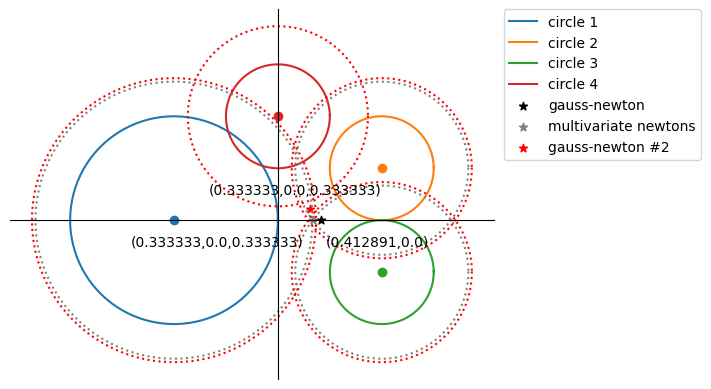

In [14]:
# gauss-newton, multivariate newtons w extra term, gauss-newton w extra term
egs_21_22_23()

###### code

## 2 models with nonlinear parameters

let function $y = f_c(x)$ fit points $(t_1,y_1),\dots,(t_m,y_m)$, where $c = [c_1,\dots,c_p]$ is the set of parameters that minimizes the sum of the squares of the residuals

\begin{align}
  r_1(c) &= f_c(t_1) = y_1 \\
  &\vdots \\
  r_m(c) &= f_c(t_m) = y_m.
\end{align}

if $c$ can be linearized (ie, by logs), then QR factorization applies. ie, the log space is where L2 norm happens. but to solve the original least squares problem, use gauss-newton to minimize error function $E$ as a function of parameter $c$. ie, matrix $Dr$ of partial derivatives of errors $r_i$ wrt parameters $c_j$

$$(DR)_{ij} = \frac{\partial r_i}{\partial c_j} = f_{c_j}(t_i).$$

##### example 24

continue example 08 with a nonlinearized exponential model.

\begin{align}
  r &=
  \begin{bmatrix}
    c_1e^{c_2t_1} - y_1 \\
    \vdots \\
    c_1e^{c_2t_m} - y_m
  \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  Dr &= -
  \begin{bmatrix}
    e^{c_2t_1} & c_1t_1e^{c_2t_1} \\
    \vdots & \vdots \\
    e^{c_2t_m} & c_1t_me^{c_2t_m}
  \end{bmatrix}.
\end{align}


In [10]:
# example 24 uses example 08 data, scipy.optimize.least_squares
eg_24a()


 58.5075·e^(+0.0577x)


newton-gauss step 0: [47.4574,0.0790] w error = 2.5426
newton-gauss step 1: [55.8620,0.0612] w error = 8.4046
newton-gauss step 2: [58.6062,0.0576] w error = 2.7442
newton-gauss step 3: [58.5030,0.0577] w error = 0.1032
newton-gauss step 4: [58.5077,0.0577] w error = 0.0048
newton-gauss step 5: [58.5075,0.0577] w error = 0.0002
newton-gauss step 6: [58.5075,0.0577] w error = 0.0000


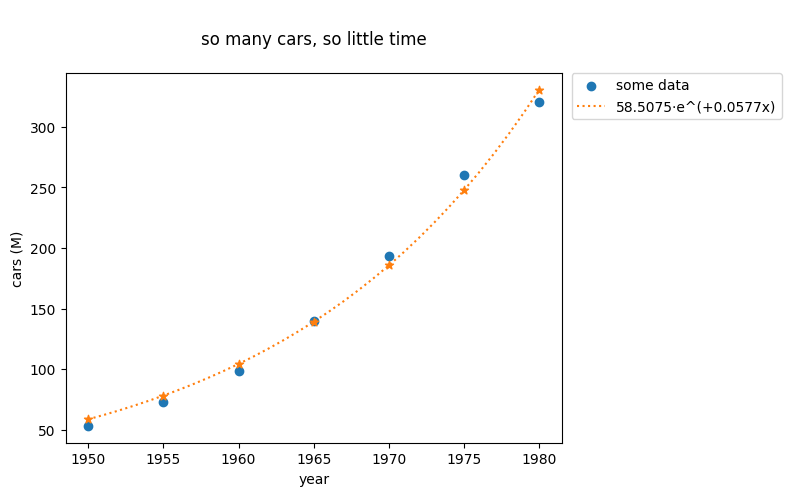

,year,cars,model,error
0,1950,53.05,58.507544,-5.4575
1,1955,73.04,78.080217,-5.0402
2,1960,98.31,104.200585,-5.8906
3,1965,139.78,139.059064,0.7209
4,1970,193.48,185.578837,7.9012
5,1975,260.20,247.660984,12.5390
6,1980,320.39,330.511626,-10.1216


In [12]:
# example 24 uses example 08 data, (b) newton-gauss
eg_24b()


coeffs, linearized: [c,k] = 3.9896,0.0615 → y(x) = 54.0315·e^(0.0615x)


coeffs, nonlinear,lmq: [c1,c2] = y(x) = 58.5075·e^(0.0577x)


coeffs, nonlinear,trf: [c1,c2] = y(x) = 58.5075·e^(0.0577x)



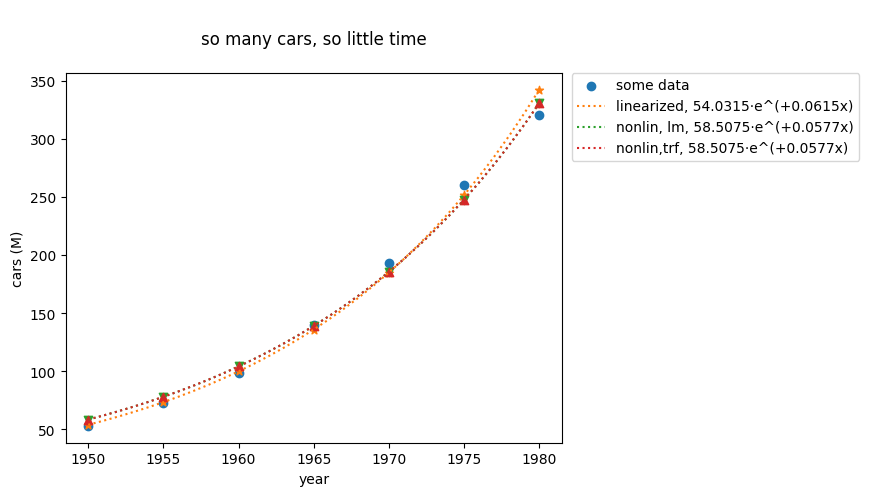

,year,cars,"mod,lin","err,lin","mod,l-m","err,l-m","mod,trf","err,trf"
0,1950,53.05,54.031463,-0.9815,58.507532,-5.4575,58.507535,-5.4575
1,1955,73.04,73.491388,-0.4514,78.080205,-5.0402,78.080208,-5.0402
2,1960,98.31,99.959982,-1.6500,104.200573,-5.8906,104.200576,-5.8906
3,1965,139.78,135.961481,3.8185,139.059054,0.7209,139.059057,0.7209
4,1970,193.48,184.929249,8.5508,185.578831,7.9012,185.578833,7.9012
5,1975,260.20,251.533205,8.6668,247.660986,12.5390,247.660986,12.5390
6,1980,320.39,342.125184,-21.7352,330.511642,-10.1216,330.511637,-10.1216


In [16]:
# example 24 uses example 08 data, (c) method comparison
eg_24c()

## 3 levenberg-marquardt

least squares minimization is tough for ill-conditioned matrix of coefficients and nonlinearity can make that worse. levenberg-marquardt uses a "regularization term" to partially remedy the conditioning problem.

##### algorithm <b>simple mod on gauss-newton</b>

```
# minimize (r[1](x))^2 + ... + (r[m](x))^2

x[0] = initial vector, λ = constant
for k in range(m) # ie, terms not dropped, n ≤ m
  A = Dr(x[k])
  (transpose(A)*A + λ*diag(transpose(A)*A))v[k] = - transpose(A)r(x[k])
  x[k+1] = x[k] + v[k]

```

note: $\lambda = 0$ is the same as gauss-newton. increasing $\lambda$ obviously increases influence of the diagonal of $A^TA$, which improves condition number and generally allows convergence from a broader set of initial guesses than gauss-newton.

##### example 25

use levenberg-marquardt to fit the model $y = c_1 e^{-c_2(t-c_3)^2}$ for data points $(t_i,y_i) = (1,3),(2,5),(2,7),(3,5),(4,1)$.

find $c_1,c_2,c_3$ that minimizes the RMSE for error vector

\begin{align}
  r &=
  \begin{bmatrix}
    c_1 e^{-c_2(t_1-c_3)^2} - y_1 \\
    \vdots \\
    c_1 e^{-c_2(t_5-c_3)^2} - y_5
  \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  Dr &=
  \begin{bmatrix}
    e^{c_2(t_1-c_3)^2} & -c_1(t_1-c_3)^2e^{c_2(t_1-c_3)^2} & 2c_1c_2(t_1-c_3)e^{c_2(t_1-c_3)^2} \\
    \vdots & & \vdots \\
    e^{c_2(t_5-c_3)^2} & -c_1(t_5-c_3)^2e^{c_2(t_5-c_3)^2} & 2c_1c_2(t_5-c_3)e^{c_2(t_5-c_3)^2}
  \end{bmatrix}
\end{align}

let inital $(c_1,c_2,c_3) = (1,1,1)$ and $\lambda = 50$.

$$\Rightarrow y = 6.301e^{-0.5088(t-2.249)^2}.$$

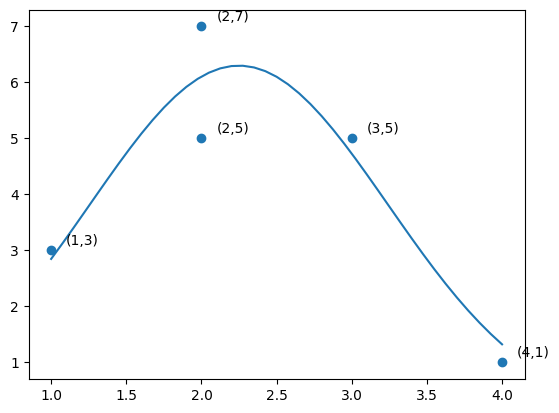

In [18]:
# example 25 plot problem data = wth
eg_25a()


coeffs, nonlinear, lmq: [c1,c2,c3] → y(x) = +6.3006·e^(-0.5088(t-2.2488)^2)

levenberg-marquardt step 11: [5.3006,-0.4912,-0.4912] w error = 5.4678



<ipython-input-19-13b7614564c9>:9: RuntimeWarning: overflow encountered in exp
  f = lambda cs,x: cs[0]*np.exp(-cs[1]*pow(x-cs[2],2))


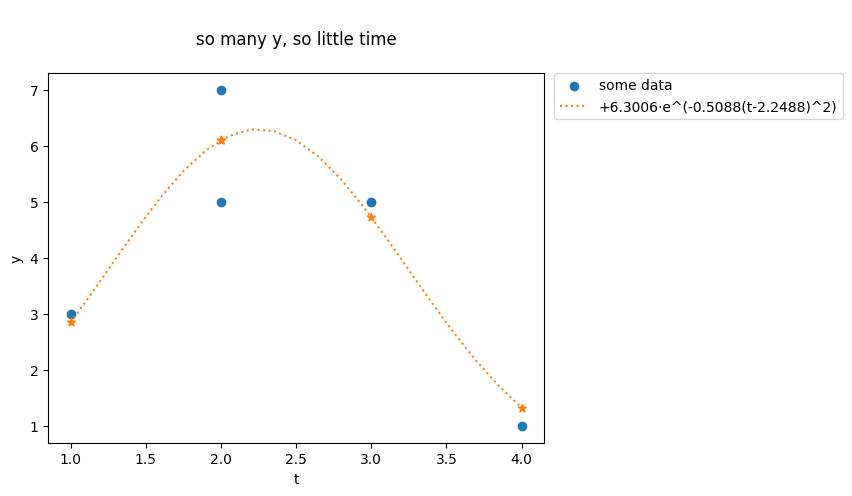

,t,y,model,error
0,1,3.0,2.849672,0.1503
1,2,5.0,6.105251,-1.1053
2,2,7.0,6.105251,0.8947
3,3,5.0,4.728192,0.2718
4,4,1.0,1.323639,-0.3236


In [20]:
# example 25 uses levenberg-marquardt by editing code from example 24, last version
eg_25b()

## miscellaney

* levenberg-marquardt [@scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html)